In [68]:
import numpy as np
import pandas as pd 
import scanpy as sc
import anndata as ad

ko = pd.read_csv('DUSP6-KO.csv')
genes = ko['Unnamed: 0']
ko = ko.drop(columns='Unnamed: 0')
data = ko.to_numpy().T
ko = ad.AnnData(data)
ko.var_names = list(genes)

# Log-normalization
sc.pp.normalize_total(ko, target_sum=10000)
sc.pp.log1p(ko)

# Perform variable feature selection
sc.pp.highly_variable_genes(ko, flavor='cell_ranger', n_top_genes=2000)

# Retrieve the highly variable features
highly_variable_features = ko.var['highly_variable']

# Filter the AnnData object based on highly variable features
ko = ko[:, highly_variable_features]

# Standardize expression values (z-score transformation)
sc.pp.scale(ko)

/pkg/python-3.10.10-1/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [69]:
df = ko.T.to_df()

# Zapisz DataFrame do pliku CSV
df.to_csv('DUSP6-KO_scaled.csv', index=False)

In [61]:
ko

AnnData object with n_obs × n_vars = 3660 × 2000
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [64]:
import numpy as np
import pandas as pd 
import scanpy as sc
import anndata as ad

wt = pd.read_csv('Wild-type.csv')
genes = wt['Unnamed: 0']
wt = wt.drop(columns='Unnamed: 0')
data = wt.to_numpy().T
wt = ad.AnnData(data)
wt.var_names = list(genes)

# Log-normalization
sc.pp.normalize_total(wt, target_sum=10000)
sc.pp.log1p(wt)

# Perform variable feature selection
sc.pp.highly_variable_genes(wt, flavor='cell_ranger', n_top_genes=2000)

# Retrieve the highly variable features
highly_variable_features = wt.var['highly_variable'] #todo make a copy 

# Filter the AnnData object based on highly variable features
wt = wt[:, highly_variable_features]

# Standardize expression values (z-score transformation)
sc.pp.scale(wt)

/pkg/python-3.10.10-1/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [66]:
df = wt.T.to_df()

# Zapisz DataFrame do pliku CSV
df.to_csv('Wild-type_scaled.csv', index=False)

<AxesSubplot: >

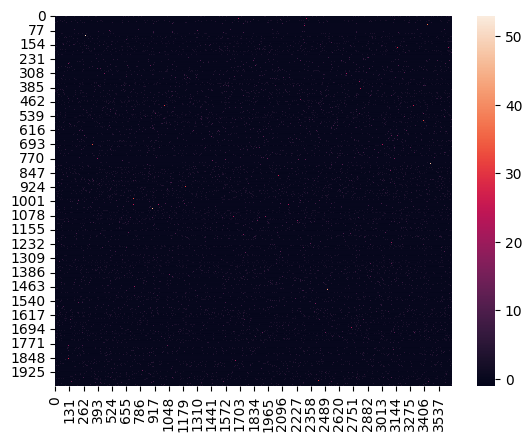

In [72]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.heatmap(df.to_numpy())

In [71]:
df.to_numpy()

array([[-0.18428486, -0.18428486, -0.18428486, ..., -0.18428486,
        -0.18428486, -0.18428486],
       [-0.40264992, -0.40264992, -0.40264992, ..., -0.40264992,
        -0.40264992,  2.84748593],
       [-0.26416601, -0.26416601, -0.26416601, ..., -0.26416601,
        -0.26416601, -0.26416601],
       ...,
       [-0.315655  , -0.315655  , -0.315655  , ..., -0.315655  ,
        -0.315655  , -0.315655  ],
       [-0.45574964, -0.45574964, -0.45574964, ..., -0.45574964,
        -0.45574964, -0.45574964],
       [-0.20851713, -0.20851713, -0.20851713, ..., -0.20851713,
        -0.20851713, -0.20851713]])

In [30]:
import numpy as np
import anndata as ad
from scipy.sparse import csr_matrix
import scanpy as sc

counts = csr_matrix(np.random.poisson(1, size=(10000, 2000)), dtype=np.float32)

In [31]:
adata = ad.AnnData(counts)


# Log-normalization
sc.pp.normalize_total(adata, target_sum=10000)
sc.pp.log1p(adata)

# Perform variable feature selection
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=2000)

# Retrieve the highly variable features
highly_variable_features = adata.var['highly_variable'] #todo make a copy 

# Filter the AnnData object based on highly variable features
adata = adata[:, highly_variable_features]

# Standardize expression values (z-score transformation)
sc.pp.scale(adata)

df = adata.T.to_df()

# Zapisz DataFrame do pliku CSV
df.to_csv('test1_scaled.csv', index=False)

/pkg/python-3.10.10-1/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


<AxesSubplot: >

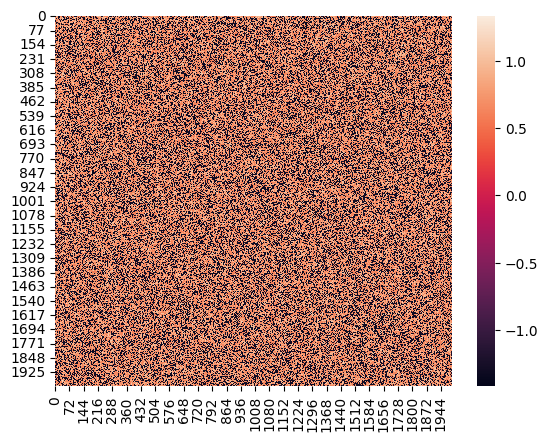

In [27]:
import seaborn as sns 
sns.heatmap(adata.to_df())